En este notebook, ilustramos cómo se puede buscar eficientemente una lista de terminos en un conjunto de textos. Por ejemplo: comunas de Los Lagos.

- Ejemplo básico de cómo utilizar el PhraseMatcher de spaCy
https://spacy.io/api/phrasematcher

In [119]:
import spacy
nlp = spacy.load("es_core_news_md")

In [120]:
from spacy.matcher import PhraseMatcher

In [121]:
matcher = PhraseMatcher(nlp.vocab)
matcher.add("OBAMA", [nlp("Barack Obama")])

In [122]:
doc = nlp("Barack Obama lifts America one last time in emotional farewell")
matches = matcher(doc)

In [123]:
for match_id, start, end in matches:
    span = doc[start:end]  # The matched span
    print(start,end)
    print(span.text.lower())

0 2
barack obama


- Ejemplo de uso del PhraseMatcher aplicado a la búsqueda de comunas de Los Lagos en un dataset de noticias

In [124]:
cities = ["Ancud","Castro","Chonchi",
           "Curaco de Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los Muermos","Maullín","Puerto Montt",
          "Puerto Varas","Osorno","Puerto Octay",
          "Purranque","Puyehue","Río Negro",
           "San Juan de la Costa","San Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

In [125]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])

In [126]:
len(matcher_cities)

30

In [127]:
import pandas

archivo = "./biodiversidad_chile_2010-01-01_2021-12-31.csv"
dataset = pandas.read_csv(archivo)

In [128]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)  

In [129]:
import pandas as pd
import numpy as np
import elasticsearch
from datetime import datetime
from pandasql import sqldf

dataset = sqldf("SELECT * FROM dataset WHERE date IN ('2021-01-01','2021-01-02','2021-01-03','2021-01-04','2021-01-05','2021-01-06','2021-01-07')")

dataset

,id_news,country,media_outlet,url,title,text,date,search
0,21921714.0,chile,radiosago,https://www.radiosago.cl/el-parque-nacional-pu...,El Parque Nacional Pumalín Douglas Tompkins cu...,Se trata de un instrumento de planificación pa...,2021-01-03,biodiversidad
1,21959894.0,chile,elciudadano,https://www.elciudadano.com/medio-ambiente/min...,Ministerio del Ambiente retira resolución para...,Por Valentina Zambrano Gran preocupación ha ge...,2021-01-05,biodiversidad
2,5148316.0,chile,elciudadano,https://www.elciudadano.com/chile/valparaiso-m...,Valparaíso: Ministerio de Medio Ambiente retir...,El humedal Salinas ubicado en la localidad de ...,2021-01-04,biodiversidad
3,6322883.0,chile,latercera,https://www.latercera.com/que-pasa/noticia/est...,Estudio de ADN ambiental identificó 179 especi...,Una medición del ADN del agua en el humedal de...,2021-01-07,biodiversidad
4,21921683.0,chile,radiosago,https://www.radiosago.cl/puerto-varas-comite-a...,Puerto Varas: Comité Ambiental Comunal manifie...,A través de una declaración pública que emitió...,2021-01-01,biodiversidad
5,22375948.0,chile,elaustral,https://www.australosorno.cl/impresa/2021/01/0...,Presentan libro con impresionantes fotografías...,Una artesana del cuero trabajando afuera de su...,2021-01-03,biodiversidad
6,22408474.0,chile,elllanquihue,https://www.ellanquihue.cl/impresa/2021/01/07/...,Modelo para medir mejor erupciones volcánicas ...,Científicos de la Universidad del Sur de Flori...,2021-01-07,biodiversidad
7,6206777.0,chile,latercera,https://www.latercera.com/tendencias/noticia/g...,Gilles Lipovetsky: “Hemos devenido en democrac...,El sociólogo francés es una de las voces más e...,2021-01-01,biodiversidad


In [130]:
for index,row in dataset.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span

            print(span.text)
    
    except:
        pass

0
Cochamó
Hualaihué
Chaitén
Palena
1
2
3
4
Puerto Varas
Maullín
Puerto Varas
Maullín
Puerto Varas
Maullín
Puerto Varas
Llanquihue
5
San Pablo
6
7


- Guardar los datos en el dataframe

In [131]:
dataset_cities = dataset

for city in cities:
    dataset_cities.insert(7,city.replace(" ","_"),0)

In [132]:
dataset_cities.columns.values

array(['id_news', 'country', 'media_outlet', 'url', 'title', 'text',
       'date', 'Palena', 'Hualaihué', 'Futaleufú', 'Chaitén', 'San_Pablo',
       'San_Juan_de_la_Costa', 'Río_Negro', 'Puyehue', 'Purranque',
       'Puerto_Octay', 'Osorno', 'Puerto_Varas', 'Puerto_Montt',
       'Maullín', 'Los_Muermos', 'Llanquihue', 'Frutillar', 'Fresia',
       'Cochamó', 'Calbuco', 'Quinchao', 'Quellón', 'Quemchi', 'Queilén',
       'Puqueldón', 'Dalcahue', 'Curaco_de_Vélez', 'Chonchi', 'Castro',
       'Ancud', 'search'], dtype=object)

In [133]:
for index,row in dataset_cities.iterrows():
    print(index)
    txt = row["text"]
    
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset_cities.at[index,span.text.replace(" ","_")]=1
    except Exception as e:
        print(e)
        pass

0
1
2
3
4
5
6
7


In [134]:
from pandasql import sqldf 

In [135]:
result = sqldf("SELECT sum(Ancud),sum(Castro),sum(Chonchi),sum(Curaco_de_Vélez),sum(Dalcahue),sum(Puqueldón),sum(Queilén),sum(Quemchi),sum(Quellón),sum(Quinchao),sum(Calbuco),sum(Cochamó),sum(Fresia),sum(Frutillar),sum(Llanquihue),sum(Los_Muermos),sum(Maullín),sum(Puerto_Montt),sum(Puerto_Varas),sum(Osorno),sum(Puerto_Octay),sum(Purranque),sum(Puyehue),sum(Río_Negro),sum(San_Juan_de_la_Costa),sum(San_Pablo),sum(Chaitén),sum(Futaleufú),sum(Hualaihué),sum(Palena) FROM dataset_cities")
result

,sum(Ancud),sum(Castro),sum(Chonchi),sum(Curaco_de_Vélez),sum(Dalcahue),sum(Puqueldón),sum(Queilén),sum(Quemchi),sum(Quellón),sum(Quinchao),...,sum(Puerto_Octay),sum(Purranque),sum(Puyehue),sum(Río_Negro),sum(San_Juan_de_la_Costa),sum(San_Pablo),sum(Chaitén),sum(Futaleufú),sum(Hualaihué),sum(Palena)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1


- Visualizar los datos en un mapa

In [136]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [137]:
def territory_map(id_region: int = 10):
    # fuente: https://www.bcn.cl/siit/mapas_vectoriales
    territory = gpd.read_file(r'./shape/comunas.shp')

    # Filtramos segun id_region: Ejemplo 14 para la region XIV (Los Rios)
    territory = territory[territory["codregion"] == id_region]

    # Obtenemos los datos de las Columnas "Comuna", "geometry"
    territory = territory[["Comuna", "geometry"]]

    return territory

In [138]:
def save_map(df, territory, image_name: str = "Mapa_Calor"):
    
    #Junta las tablas df y Pais
    territory = territory.merge(df, on = "Comuna")
    
    #Inicializa matplotlib para la creacion del mapa
    fig, ax = plt.subplots(1, 1)
    max_presente = df.max()[1]#valore maximo para la barra de calor
    territory.plot(column = 'Valor',ax=ax,edgecolor = "gray", cmap = 'OrRd', legend = False).set_axis_off()
    bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0,vmax=max_presente))
    bar_info._A = []
    cbar = fig.colorbar(bar_info)
    
    #Guardar imagen en nombre_imagen
    plt.savefig('.//{}.svg'.format(image_name), bbox_inches = "tight",transparent = True)

San Pablo
PuqueldÃ³n
Fresia
Llanquihue
Osorno
Purranque
Puyehue
CochamÃ³
Ancud
QuellÃ³n
QueilÃ©n
Chonchi
Puerto Montt
RÃ­o Negro
Castro
Dalcahue
Quemchi
San Juan de la Costa
Calbuco
ChaitÃ©n
Los Muermos
MaullÃ­n
Quinchao
Curaco de VÃ©lez
Puerto Octay
Frutillar
Puerto Varas
HualaihuÃ©
Palena
FutaleufÃº


/tmp/ipykernel_3317/2505532607.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info)


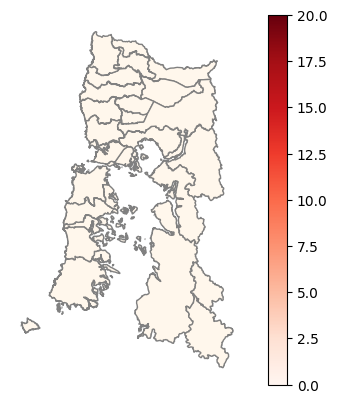

In [139]:
territory = territory_map(10)
lista =[]
n = 20
for i in territory["Comuna"]:
    print(i)
    lista.append({"Comuna": i, "Valor": n})
df = pandas.DataFrame(lista)

save_map(df, territory, "Mapa")

In [140]:
Noticieros = sqldf("SELECT media_outlet, COUNT(*) from dataset_cities GROUP BY media_outlet")
Noticieros

,media_outlet,COUNT(*)
0,elaustral,1
1,elciudadano,2
2,elllanquihue,1
3,latercera,2
4,radiosago,2


In [141]:
noticias = dataset_cities.text.values.tolist()

In [142]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [144]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [145]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7


In [146]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [147]:
texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

In [148]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [149]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.016*"crisis" + 0.009*"vida" + 0.009*"futuro" + 0.009*"sociedad" + '
  '0.008*"parte" + 0.007*"humedales" + 0.007*"biodiversidad" + '
  '0.007*"autoridad" + 0.007*"empresas" + 0.007*"gente" + 0.006*"especies" + '
  '0.006*"problema" + 0.006*"cambio" + 0.006*"mujeres" + 0.005*"trabajo" + '
  '0.005*"consumo" + 0.005*"protección" + 0.005*"hijos" + 0.005*"educación" + '
  '0.004*"zona" + 0.004*"declaración" + 0.004*"problemas" + 0.004*"libertad" + '
  '0.004*"mundo" + 0.004*"poder" + 0.004*"desarrollo" + 0.004*"proceso" + '
  '0.004*"casa" + 0.004*"ecosistemas" + 0.004*"santuario" + 0.004*"tiempo" + '
  '0.004*"niños" + 0.004*"padre" + 0.004*"valor" + 0.004*"ejemplo" + '
  '0.004*"mujer" + 0.004*"soluciones" + 0.004*"inseguridad" + 0.004*"cambios" '
  '+ 0.004*"río" + 0.003*"sentido" + 0.003*"sector" + 0.003*"riqueza" + '
  '0.003*"país" + 0.003*"especies endémicas" + 0.003*"área" + '
  '0.003*"calentamiento" + 0.003*"partes" + 0.003*"carbono" + '
  '0.003*"emisiones" + 0.003*"de

In [150]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/maquinitaz/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/maquinitaz/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.113718 -0.045849       1        1  63.354995
4     -0.130322 -0.035127       2        1  31.006914
1      0.007658  0.085976       3        1   5.625794
2      0.004440 -0.002352       4        1   0.007429
3      0.004506 -0.002648       5        1   0.004867, topic_info=            Term       Freq      Total Category  logprob  loglift
650       crisis  16.000000  16.000000  Default  30.0000  30.0000
872     sociedad   8.000000   8.000000  Default  29.0000  29.0000
703     empresas   7.000000   7.000000  Default  28.0000  28.0000
612    autoridad   7.000000   7.000000  Default  27.0000  27.0000
162    humedales   7.000000   7.000000  Default  26.0000  26.0000
..           ...        ...        ...      ...      ...      ...
762  inseguridad   0.000085   3.758086   Topic5  -6.8094  -0.7663
773     libertad   0.000085   4.604238   Topic5  -6.8077  -0.9676
162    humedales   0.000086   7.464441   Topic5  -6.8031  -1.4462
256         zona   0.000086   9.265585   Topic5  -6.8014  -1.6606
828        poder   0.000085   4.602509   Topic5  -6.8081  -0.9677

[322 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
408       2  1.096637   Fernando Ruz
281       2  0.701855           agua
283       3  0.976000       animales
285       3  0.976278       análisis
612       1  0.980512      autoridad
...     ...       ...            ...
274       2  0.701710            Es
523       2  0.785191  Ángel Beroiza
59        1  0.590215           área
59        2  0.393477           área
404       2  0.908096              “

[158 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 2, 3, 4])

In [151]:

#sum(Ancud),sum(Castro),sum(Chonchi),sum(Curaco_de_Vélez),sum(Dalcahue),sum(Puqueldón),sum(Queilén),sum(Quemchi),sum(Quellón),sum(Quinchao)
# ,sum(Calbuco),sum(Cochamó),sum(Fresia),sum(Frutillar),sum(Llanquihue),sum(Los_Muermos),sum(Maullín),sum(Puerto_Montt),sum(Puerto_Varas)
# ,sum(Osorno),sum(Puerto_Octay),sum(Purranque),sum(Puyehue),sum(Río_Negro),sum(San_Juan_de_la_Costa),sum(San_Pablo),sum(Chaitén),sum(Futaleufú)
# ,sum(Hualaihué),sum(Palena)

NoticiasCorpus = dataset_cities

NoticiasAncud = sqldf("SELECT * from NoticiasCorpus WHERE Ancud > 0")
NoticiasCastro = sqldf("SELECT * from NoticiasCorpus WHERE Castro > 0")
NoticiasChonchi = sqldf("SELECT * from NoticiasCorpus WHERE Chonchi > 0")
NoticiasCuraco_de_Velez = sqldf("SELECT * from NoticiasCorpus WHERE Curaco_de_Vélez > 0")
NoticiasDalcahue = sqldf("SELECT * from NoticiasCorpus WHERE Dalcahue > 0")
NoticiasPuqueldon = sqldf("SELECT * from NoticiasCorpus WHERE Puqueldón > 0")
NoticiasQueilen = sqldf("SELECT * from NoticiasCorpus WHERE Queilén > 0")
NoticiasQuemchi = sqldf("SELECT * from NoticiasCorpus WHERE Quemchi > 0")
NoticiasQuellon = sqldf("SELECT * from NoticiasCorpus WHERE Quellón > 0")
NoticiasQuinchao = sqldf("SELECT * from NoticiasCorpus WHERE Quinchao > 0")
NoticiasCalbuco = sqldf("SELECT * from NoticiasCorpus WHERE Calbuco > 0")
NoticiasCochamo = sqldf("SELECT * from NoticiasCorpus WHERE Cochamó > 0")
NoticiasFresia = sqldf("SELECT * from NoticiasCorpus WHERE Fresia > 0")
NoticiasFrutillar = sqldf("SELECT * from NoticiasCorpus WHERE Frutillar > 0")
NoticiasLlanquihue = sqldf("SELECT * from NoticiasCorpus WHERE Llanquihue > 0")
NoticiasLos_Muermos = sqldf("SELECT * from NoticiasCorpus WHERE Los_Muermos > 0")
NoticiasMaullin = sqldf("SELECT * from NoticiasCorpus WHERE Maullín > 0")
NoticiasPuerto_Montt = sqldf("SELECT * from NoticiasCorpus WHERE Puerto_Montt > 0")
NoticiasPuerto_Varas = sqldf("SELECT * from NoticiasCorpus WHERE Puerto_Varas > 0")
NoticiasOsorno = sqldf("SELECT * from NoticiasCorpus WHERE Osorno > 0")
NoticiasPuerto_Octay = sqldf("SELECT * from NoticiasCorpus WHERE Puerto_Octay > 0")
NoticiasPurranque = sqldf("SELECT * from NoticiasCorpus WHERE Purranque > 0")
NoticiasPuyehue = sqldf("SELECT * from NoticiasCorpus WHERE Puyehue > 0")
NoticiasRio_Negro = sqldf("SELECT * from NoticiasCorpus WHERE Río_Negro > 0")
NoticiasSanJuandelaCosta = sqldf("SELECT * from NoticiasCorpus WHERE San_Juan_de_la_Costa > 0")
NoticiasSan_Pablo = sqldf("SELECT * from NoticiasCorpus WHERE San_Pablo > 0")
NoticiasChaiten = sqldf("SELECT * from NoticiasCorpus WHERE Chaitén > 0")
NoticiasFutaleufu = sqldf("SELECT * from NoticiasCorpus WHERE Futaleufú > 0")
NoticiasHualaihue = sqldf("SELECT * from NoticiasCorpus WHERE Hualaihué > 0")
NoticiasPalena = sqldf("SELECT * from NoticiasCorpus WHERE Palena > 0")


In [152]:
# Veremos los topicos de las comunas que TIENEN noticias en la primera semana de 2021

In [153]:
NoticiasCochamo

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud,search
0,21921714.0,chile,radiosago,https://www.radiosago.cl/el-parque-nacional-pu...,El Parque Nacional Pumalín Douglas Tompkins cu...,Se trata de un instrumento de planificación pa...,2021-01-03,1,1,0,...,0,0,0,0,0,0,0,0,0,biodiversidad


In [154]:
NoticiasLlanquihue

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud,search
0,21921683.0,chile,radiosago,https://www.radiosago.cl/puerto-varas-comite-a...,Puerto Varas: Comité Ambiental Comunal manifie...,A través de una declaración pública que emitió...,2021-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,biodiversidad


In [155]:
NoticiasMaullin

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud,search
0,21921683.0,chile,radiosago,https://www.radiosago.cl/puerto-varas-comite-a...,Puerto Varas: Comité Ambiental Comunal manifie...,A través de una declaración pública que emitió...,2021-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,biodiversidad


In [156]:
NoticiasPuerto_Varas

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud,search
0,21921683.0,chile,radiosago,https://www.radiosago.cl/puerto-varas-comite-a...,Puerto Varas: Comité Ambiental Comunal manifie...,A través de una declaración pública que emitió...,2021-01-01,0,0,0,...,0,0,0,0,0,0,0,0,0,biodiversidad


In [157]:
NoticiasSan_Pablo

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud,search
0,22375948.0,chile,elaustral,https://www.australosorno.cl/impresa/2021/01/0...,Presentan libro con impresionantes fotografías...,Una artesana del cuero trabajando afuera de su...,2021-01-03,0,0,0,...,0,0,0,0,0,0,0,0,0,biodiversidad


In [158]:
NoticiasChaiten

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud,search
0,21921714.0,chile,radiosago,https://www.radiosago.cl/el-parque-nacional-pu...,El Parque Nacional Pumalín Douglas Tompkins cu...,Se trata de un instrumento de planificación pa...,2021-01-03,1,1,0,...,0,0,0,0,0,0,0,0,0,biodiversidad


In [159]:
NoticiasHualaihue

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud,search
0,21921714.0,chile,radiosago,https://www.radiosago.cl/el-parque-nacional-pu...,El Parque Nacional Pumalín Douglas Tompkins cu...,Se trata de un instrumento de planificación pa...,2021-01-03,1,1,0,...,0,0,0,0,0,0,0,0,0,biodiversidad


In [160]:
NoticiasPalena

,id_news,country,media_outlet,url,title,text,date,Palena,Hualaihué,Futaleufú,...,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud,search
0,21921714.0,chile,radiosago,https://www.radiosago.cl/el-parque-nacional-pu...,El Parque Nacional Pumalín Douglas Tompkins cu...,Se trata de un instrumento de planificación pa...,2021-01-03,1,1,0,...,0,0,0,0,0,0,0,0,0,biodiversidad


In [161]:
# -Topicos-
# Empezando por Cochamo
noticias = NoticiasCochamo.text.values.tolist()

def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

0


/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.011822  0.0       1        1  99.843393
3      0.002388 -0.0       2        1   0.055397
0      0.003123 -0.0       3        1   0.035101
1      0.002988  0.0       4        1   0.033073
4      0.003324  0.0       5        1   0.033035, topic_info=                            Term      Freq     Total Category  logprob  \
53                           río  3.000000  3.000000  Default  30.0000   
51                    protección  2.000000  2.000000  Default  29.0000   
16                        cuenca  2.000000  2.000000  Default  28.0000   
5                 administración  1.000000  1.000000  Default  27.0000   
34                     hectáreas  1.000000  1.000000  Default  26.0000   
..                           ...       ...       ...      ...      ...   
8                  biodiversidad  0.000422  1.899835   Topic5  -4.1109   
43                         parte  0.000422  1.899374   Topic5  -4.1109   
54                           sur  0.000422  1.038839   Topic5  -4.1109   
33                       gracias  0.000422  1.038671   Topic5  -4.1109   
39  instrumento de planificación  0.000422  1.038629   Topic5  -4.1109   

    loglift  
53  30.0000  
51  29.0000  
16  28.0000  
5   27.0000  
34  26.0000  
..      ...  
8   -0.3959  
43  -0.3957  
54   0.2077  
33   0.2079  
39   0.2079  

[244 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         1  0.962932   Ingrid Espinoza
1         1  0.963158     Jorge Aichele
2         1  0.963302  Rodrigo Carrasco
3         1  0.962086            acción
4         1  0.963006   acción conjunta
...     ...       ...               ...
56        1  0.962990            través
57        1  0.963475             valor
58        1  0.962834            volcán
59        1  0.963299              área
60        1  0.962959    área silvestre

[61 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5])

In [162]:
# -Topicos-
# Llanquihue
noticias = NoticiasLlanquihue.text.values.tolist()

def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

0


/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1     -0.004482  0.0       1        1  99.875948
3      0.001212 -0.0       2        1   0.047267
0      0.001114 -0.0       3        1   0.027823
4      0.001067 -0.0       4        1   0.024749
2      0.001089  0.0       5        1   0.024212, topic_info=                          Term      Freq     Total Category  logprob  loglift
4                  autoridades  3.000000  3.000000  Default  30.0000  30.0000
65                  reservorio  1.000000  1.000000  Default  29.0000  29.0000
24                 declaración  1.000000  1.000000  Default  28.0000  28.0000
45                 ley vigente  1.000000  1.000000  Default  27.0000  27.0000
58  prácticas de deforestación  1.000000  1.000000  Default  26.0000  26.0000
..                         ...       ...       ...      ...      ...      ...
68                         rol  0.000257  1.010132   Topic5  -4.3818   0.0507
15  complicidad de autoridades  0.000257  1.009999   Topic5  -4.3820   0.0507
4                  autoridades  0.000262  3.532101   Topic5  -4.3624  -1.1816
65                  reservorio  0.000260  1.848975   Topic5  -4.3732  -0.5452
24                 declaración  0.000258  1.849458   Topic5  -4.3774  -0.5496

[223 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
0         1  0.989886             acción
1         1  0.990349  acción de relleno
2         1  0.990511               agua
3         1  0.989740         agua dulce
4         1  1.132471        autoridades
...     ...       ...                ...
75        1  0.989604         vida único
76        1  0.990164              vista
77        1  0.989575        vista gorda
78        1  0.989409                  “
79        1  0.990029        “ecológicas

[80 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])

In [163]:
# -Topicos-
# Maullin
noticias = NoticiasMaullin.text.values.tolist()

def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

0


/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1     -0.004482  0.0       1        1  99.875948
3      0.001212 -0.0       2        1   0.047267
0      0.001114 -0.0       3        1   0.027823
4      0.001067 -0.0       4        1   0.024749
2      0.001089  0.0       5        1   0.024212, topic_info=                          Term      Freq     Total Category  logprob  loglift
4                  autoridades  3.000000  3.000000  Default  30.0000  30.0000
65                  reservorio  1.000000  1.000000  Default  29.0000  29.0000
24                 declaración  1.000000  1.000000  Default  28.0000  28.0000
45                 ley vigente  1.000000  1.000000  Default  27.0000  27.0000
58  prácticas de deforestación  1.000000  1.000000  Default  26.0000  26.0000
..                         ...       ...       ...      ...      ...      ...
68                         rol  0.000257  1.010132   Topic5  -4.3818   0.0507
15  complicidad de autoridades  0.000257  1.009999   Topic5  -4.3820   0.0507
4                  autoridades  0.000262  3.532101   Topic5  -4.3624  -1.1816
65                  reservorio  0.000260  1.848975   Topic5  -4.3732  -0.5452
24                 declaración  0.000258  1.849458   Topic5  -4.3774  -0.5496

[223 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
0         1  0.989886             acción
1         1  0.990349  acción de relleno
2         1  0.990511               agua
3         1  0.989740         agua dulce
4         1  1.132471        autoridades
...     ...       ...                ...
75        1  0.989604         vida único
76        1  0.990164              vista
77        1  0.989575        vista gorda
78        1  0.989409                  “
79        1  0.990029        “ecológicas

[80 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])

In [164]:
# -Topicos-
# Puerto Varas
noticias = NoticiasPuerto_Varas.text.values.tolist()

def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

0


/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1     -0.004482  0.0       1        1  99.875948
3      0.001212 -0.0       2        1   0.047267
0      0.001114 -0.0       3        1   0.027823
4      0.001067 -0.0       4        1   0.024749
2      0.001089  0.0       5        1   0.024212, topic_info=                          Term      Freq     Total Category  logprob  loglift
4                  autoridades  3.000000  3.000000  Default  30.0000  30.0000
65                  reservorio  1.000000  1.000000  Default  29.0000  29.0000
24                 declaración  1.000000  1.000000  Default  28.0000  28.0000
45                 ley vigente  1.000000  1.000000  Default  27.0000  27.0000
58  prácticas de deforestación  1.000000  1.000000  Default  26.0000  26.0000
..                         ...       ...       ...      ...      ...      ...
68                         rol  0.000257  1.010132   Topic5  -4.3818   0.0507
15  complicidad de autoridades  0.000257  1.009999   Topic5  -4.3820   0.0507
4                  autoridades  0.000262  3.532101   Topic5  -4.3624  -1.1816
65                  reservorio  0.000260  1.848975   Topic5  -4.3732  -0.5452
24                 declaración  0.000258  1.849458   Topic5  -4.3774  -0.5496

[223 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
0         1  0.989886             acción
1         1  0.990349  acción de relleno
2         1  0.990511               agua
3         1  0.989740         agua dulce
4         1  1.132471        autoridades
...     ...       ...                ...
75        1  0.989604         vida único
76        1  0.990164              vista
77        1  0.989575        vista gorda
78        1  0.989409                  “
79        1  0.990029        “ecológicas

[80 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])

In [165]:
# -Topicos-
# San Pablo
noticias = NoticiasSan_Pablo.text.values.tolist()

def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

0


/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
4     -0.016865  0.0       1        1  99.976798
1      0.004734  0.0       2        1   0.012232
2      0.004241 -0.0       3        1   0.005175
3      0.004183  0.0       4        1   0.003133
0      0.003706 -0.0       5        1   0.002662, topic_info=                Term      Freq     Total Category  logprob  loglift
80             libro  7.000000  7.000000  Default  30.0000  30.0000
118           región  6.000000  6.000000  Default  29.0000  29.0000
148    Ángel Beroiza  2.000000  2.000000  Default  28.0000  28.0000
138          turismo  2.000000  2.000000  Default  27.0000  27.0000
97             parte  2.000000  2.000000  Default  26.0000  26.0000
..               ...       ...       ...      ...      ...      ...
124           sector  0.000035  1.910750   Topic5  -5.0171  -0.3613
57             fotos  0.000035  1.910369   Topic5  -5.0172  -0.3611
63   gerente general  0.000035  1.911439   Topic5  -5.0188  -0.3633
106         personas  0.000035  1.911291   Topic5  -5.0192  -0.3637
149             área  0.000035  1.911417   Topic5  -5.0192  -0.3637

[323 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
0         1  0.958738      Claudio Almarza
1         1  0.959631        Conocí Regina
2         1  1.047564         Fernando Ruz
3         1  0.959464             ambiente
5         1  0.959211    arreo de corderos
...     ...       ...                  ...
147       1  0.958150         zona costera
148       1  1.080346        Ángel Beroiza
149       1  1.046344                 área
150       1  0.959413  área marino-costera
151       1  0.959235              énfasis

[126 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

In [166]:
# -Topicos-
# Chaiten
noticias = NoticiasChaiten.text.values.tolist()

def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

0


/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.011822  0.0       1        1  99.843393
3      0.002388 -0.0       2        1   0.055397
0      0.003123 -0.0       3        1   0.035101
1      0.002988  0.0       4        1   0.033073
4      0.003324  0.0       5        1   0.033035, topic_info=                            Term      Freq     Total Category  logprob  \
53                           río  3.000000  3.000000  Default  30.0000   
51                    protección  2.000000  2.000000  Default  29.0000   
16                        cuenca  2.000000  2.000000  Default  28.0000   
5                 administración  1.000000  1.000000  Default  27.0000   
34                     hectáreas  1.000000  1.000000  Default  26.0000   
..                           ...       ...       ...      ...      ...   
8                  biodiversidad  0.000422  1.899835   Topic5  -4.1109   
43                         parte  0.000422  1.899374   Topic5  -4.1109   
54                           sur  0.000422  1.038839   Topic5  -4.1109   
33                       gracias  0.000422  1.038671   Topic5  -4.1109   
39  instrumento de planificación  0.000422  1.038629   Topic5  -4.1109   

    loglift  
53  30.0000  
51  29.0000  
16  28.0000  
5   27.0000  
34  26.0000  
..      ...  
8   -0.3959  
43  -0.3957  
54   0.2077  
33   0.2079  
39   0.2079  

[244 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         1  0.962932   Ingrid Espinoza
1         1  0.963158     Jorge Aichele
2         1  0.963302  Rodrigo Carrasco
3         1  0.962086            acción
4         1  0.963006   acción conjunta
...     ...       ...               ...
56        1  0.962990            través
57        1  0.963475             valor
58        1  0.962834            volcán
59        1  0.963299              área
60        1  0.962959    área silvestre

[61 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5])

In [167]:
# -Topicos-
# Hualaihue
noticias = NoticiasHualaihue.text.values.tolist()

def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

0


/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.011822  0.0       1        1  99.843393
3      0.002388 -0.0       2        1   0.055397
0      0.003123 -0.0       3        1   0.035101
1      0.002988  0.0       4        1   0.033073
4      0.003324  0.0       5        1   0.033035, topic_info=                            Term      Freq     Total Category  logprob  \
53                           río  3.000000  3.000000  Default  30.0000   
51                    protección  2.000000  2.000000  Default  29.0000   
16                        cuenca  2.000000  2.000000  Default  28.0000   
5                 administración  1.000000  1.000000  Default  27.0000   
34                     hectáreas  1.000000  1.000000  Default  26.0000   
..                           ...       ...       ...      ...      ...   
8                  biodiversidad  0.000422  1.899835   Topic5  -4.1109   
43                         parte  0.000422  1.899374   Topic5  -4.1109   
54                           sur  0.000422  1.038839   Topic5  -4.1109   
33                       gracias  0.000422  1.038671   Topic5  -4.1109   
39  instrumento de planificación  0.000422  1.038629   Topic5  -4.1109   

    loglift  
53  30.0000  
51  29.0000  
16  28.0000  
5   27.0000  
34  26.0000  
..      ...  
8   -0.3959  
43  -0.3957  
54   0.2077  
33   0.2079  
39   0.2079  

[244 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         1  0.962932   Ingrid Espinoza
1         1  0.963158     Jorge Aichele
2         1  0.963302  Rodrigo Carrasco
3         1  0.962086            acción
4         1  0.963006   acción conjunta
...     ...       ...               ...
56        1  0.962990            través
57        1  0.963475             valor
58        1  0.962834            volcán
59        1  0.963299              área
60        1  0.962959    área silvestre

[61 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5])

In [168]:
# -Topicos-
# Palena
noticias = NoticiasPalena.text.values.tolist()

def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

0


/home/maquinitaz/.local/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.011822  0.0       1        1  99.843393
3      0.002388 -0.0       2        1   0.055397
0      0.003123 -0.0       3        1   0.035101
1      0.002988  0.0       4        1   0.033073
4      0.003324  0.0       5        1   0.033035, topic_info=                            Term      Freq     Total Category  logprob  \
53                           río  3.000000  3.000000  Default  30.0000   
51                    protección  2.000000  2.000000  Default  29.0000   
16                        cuenca  2.000000  2.000000  Default  28.0000   
5                 administración  1.000000  1.000000  Default  27.0000   
34                     hectáreas  1.000000  1.000000  Default  26.0000   
..                           ...       ...       ...      ...      ...   
8                  biodiversidad  0.000422  1.899835   Topic5  -4.1109   
43                         parte  0.000422  1.899374   Topic5  -4.1109   
54                           sur  0.000422  1.038839   Topic5  -4.1109   
33                       gracias  0.000422  1.038671   Topic5  -4.1109   
39  instrumento de planificación  0.000422  1.038629   Topic5  -4.1109   

    loglift  
53  30.0000  
51  29.0000  
16  28.0000  
5   27.0000  
34  26.0000  
..      ...  
8   -0.3959  
43  -0.3957  
54   0.2077  
33   0.2079  
39   0.2079  

[244 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
0         1  0.962932   Ingrid Espinoza
1         1  0.963158     Jorge Aichele
2         1  0.963302  Rodrigo Carrasco
3         1  0.962086            acción
4         1  0.963006   acción conjunta
...     ...       ...               ...
56        1  0.962990            través
57        1  0.963475             valor
58        1  0.962834            volcán
59        1  0.963299              área
60        1  0.962959    área silvestre

[61 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 2, 5])